# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib

import import_ipynb

import data_preprocessing
import input_preprocessing
import output_preprocessing
import evaluation_methods as eval_ms
import models


data = data_preprocessing.Data(tags_or_genres='genres', min_label_occ=50)



# Helpers

# Calculating

## Compare all evaluation methods
(using TF-IDF and logistic regression)

In [2]:
X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

eval_names = ['recall', 'jaccardscore', 'exactmatch', 'hammingloss', 'f1score']
eval_methods = [eval_ms.recall, eval_ms.jaccardscore, eval_ms.exactmatch, eval_ms.hammingloss, eval_ms.f1score]
evaluations = []
eval_history = []

for evaluate in eval_methods:
    model = models.LogisticRegression(X, y, evaluate, max_iter=20)
    model.fit()
    evaluations.append(model.evaluate())
    eval_history.append(model.history_)

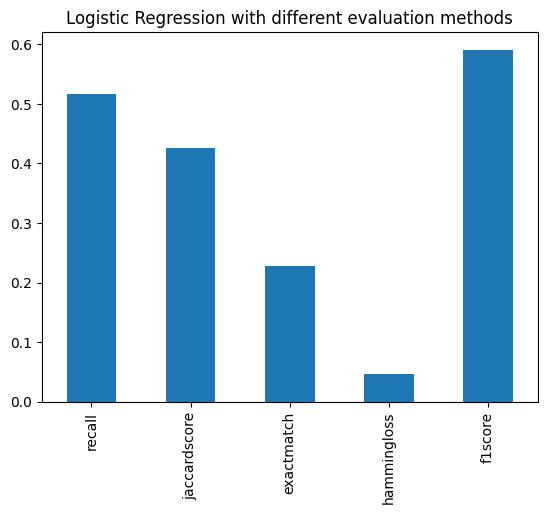

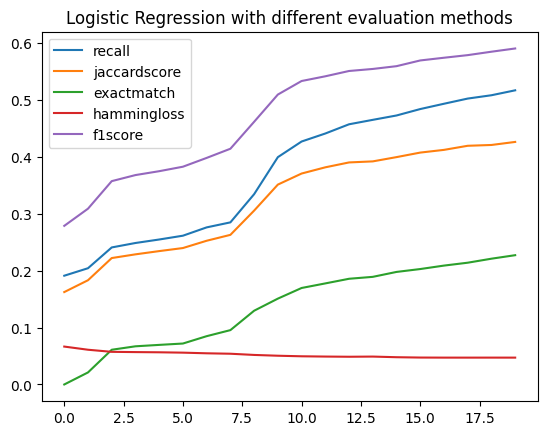

In [3]:
eval_df = pd.DataFrame(evaluations, index=eval_names)
eval_df.plot(kind='bar', legend=False)
plt.title('Logistic Regression with different evaluation methods')
plt.show()

for history in eval_history:
    plt.plot(history)
plt.legend(eval_names)
plt.title('Logistic Regression with different evaluation methods')
plt.show()

## Compare all models
(using TF-IDF and f1score)

In [2]:
X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])

evaluation = eval_ms.f1score
model_names = []
evaluations = []

In [ ]:
model = models.LogisticRegression(X, y, evaluation, max_iter=30)
model.fit()
model_names.append('LR')
evaluations.append(model.evaluate())

In [6]:
model = models.KNN(X, y, evaluation)
model.fit()
model_names.append("KNN")
evaluations.append(model.evaluate())

In [7]:
model = models.DecisionTree(X, y, evaluation)
model.fit()
model_names.append("DT")
evaluations.append(model.evaluate())

In [ ]:
model = models.RandomForest(X, y, evaluation)
model.fit()
model_names.append("RF")
evaluations.append(model.evaluate())

In [10]:
model = models.NaiveBayes(X, y, evaluation)
model.fit()
model_names.append("NB")
evaluations.append(model.evaluate())

In [10]:
tmodel = models.SVM(X, y, evaluation)
tmodel.fit()
model_names.append("SVM")
evaluations.append(tmodel.evaluate())

: 

: 

In [ ]:
model = models.MLP(X, y, evaluation)
model.fit()
model_names.append("MLP")
evaluations.append(model.evaluate())

c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

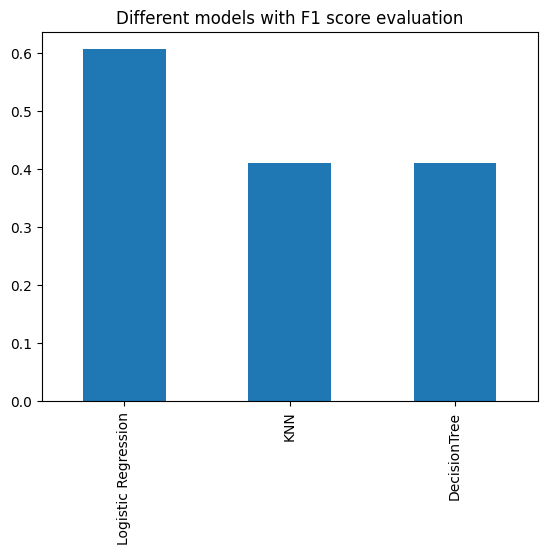

In [18]:
eval_df = pd.DataFrame(evaluations, index=model_names)
eval_df.plot(kind='bar', legend=False)
plt.title('Different models with F1 score evaluation')
plt.show()

## Plot trained decision tree
(TF-IDF f1score)

In [ ]:
from sklearn import tree

X = input_preprocessing.tfidf(data.games['description'], max_features=10000)
y = output_preprocessing.multilabel_binarizer(data.games['genres'])


tmodel = models.DecisionTree(X, y, eval_ms.f1score)
tmodel.fit()

tree.plot_tree(tmodel.tree, max_depth=10)

# TEST

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np

class SVM:
    def __init__(self, X, y, evaluate, C_values=None, cv=5):
        self.evaluate_ = evaluate
        self.C_values = C_values if C_values is not None else [0.1, 1.0, 10.0]
        self.cv = cv
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)
        self.svm = None  
        self.history_ = []

    def fit(self):
        best_C = None
        best_score = -np.inf
        
        for C in self.C_values:
            temp_svm = MultiOutputClassifier(SVC(C=C), n_jobs=-1)
            scores = cross_validate(temp_svm, self.X_train, self.y_train, cv=self.cv, scoring=self.evaluate_, return_estimator=False)
            mean_score = np.mean(scores['test_score'])
            
            self.history_.append({'C': C, 'score': mean_score})
            
            if mean_score > best_score:
                best_score = mean_score
                best_C = C
        
        self.svm = MultiOutputClassifier(SVC(C=best_C), n_jobs=-1)
        self.svm.fit(self.X_train, self.y_train)
        
    def predict(self, X):
        return self.svm.predict(X)
    
    def evaluate(self):
        y_pred = self.predict(self.X_test)
        return self.evaluate_(y_pred, self.y_test)

tmodel = SVM(X, y, evaluation)
tmodel.fit()